**Librerie**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA #methods PCA
import os
import tensorflow as tf
import cv2
#import matplotlib
#import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget '/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_closed_eye.zip' 
!unzip '/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_closed_eye.zip' -d '/content/drive/MyDrive/ProgettoCV&DL/MRL'

In [ ]:
!wget '/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_opened_eye.zip' 
!unzip '/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_opened_eye.zip' -d '/content/drive/MyDrive/ProgettoCV&DL/MRL'

/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_opened_eye.zip: Scheme missing.


**PCA Method**

In [ ]:
def lin_image(base_image):
    (H,W,channel) = np.shape(base_image)                  #prendo la forma (altezza,larghezza e canali)
    lin_image = base_image.reshape(H*W,channel).squeeze() #linearizzo, togliendo una dimensione
    return lin_image

def unlin_image(in_image,H,W):
    (L,channel) = np.shape(in_image)                      #Prendo la forma e salvo in L
    
    #Vado a verificare le possibili dimensioni dell'immagine
    if L != H*W:
        raise ValueError('The length of the image does not correspond to the Height and width input')
    # Delinearizzo
    base_image = in_image.reshape(H,W,channel).squeeze()  #torna alla forma iniziale 
    return base_image

In [ ]:
# Compute the PCA of the image
def PCAImage(image,n_components=1):       #spazio dimensionale
    # Ottengo la dimensione dell'immagine
    (H, W, ch) = np.shape(image)
    #Creo un oggetto PCA dalla libreria scikit-learn
    sklearn_pca = PCA(n_components=n_components)
    #Applico il PCA all'immagine linearizzata
    lin_pca = sklearn_pca.fit_transform(lin_image(image))
    #Trasformo l'immagine linearizzata in immagine normale
    out_pca = unlin_image(lin_pca, H, W)
    #cast dell'immagine di output nel formato uint8 (0-255)
    out_pca = np.uint8((out_pca - np.min(out_pca)) * 255 / (np.max(out_pca) - np.min(out_pca))) #varianza/covarianza(?)
    return out_pca

***Functions***





In [ ]:
def imageInputPLot():
    #Plot the image
    plt.figure()
    plt.plot()
    plt.title('Input image')
    plt.imshow(input_image)

def imageGrayTransf():
    #Gray image transform
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    #Plot gray image
    plt.plot()
    plt.title('Gray image')
    plt.imshow(gray_image, cmap='gray')

def imagePcaTransf():
    #Compute the pca transform
    pca_image = PCAImage(input_image, n_components=1) 

    #Plot pca image
    plt.plot()
    plt.title('PCA image')
    plt.imshow(255-pca_image, cmap='gray')
    plt.show()

def ImgToPixels(img):
    pixels = np.zeros(shape = [0])
    for i in range (img.shape[0]): #traverses through height of the image
      for j in range (img.shape[1]): #traverses through width of the image
        pixels = np.append(pixels,img[i][j])
    return pixels

**Graphics Closed_eye**

In [ ]:
if __name__ == '__main__':
  
  folder = "/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_closed_eye"   #percorso della cartella closed_eye
  index = 0
  for file_name in os.listdir(folder):
      if index == 5 : 
        break 
      input_image =cv2.imread(folder + "/" + file_name)
      input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) 
      gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)  # conversione in scala di grigi
      pca_image = PCAImage(input_image, n_components=1)
 
      
      #Print grafico dell'immagine originale
      plt.figure()
      plt.subplot(1,2,1)
      plt.title('Input image')
      plt.imshow(input_image)
      #cv2_imshow(input_image)    #non funziona mette l'immagine fuori dalla griglia
      
      #Print grafico in GreySCALE
      plt.subplot(2,2,2)
      plt.title('Gray image')
      plt.imshow(gray_image, cmap='gray')
     
      #Print grafico in PCA
      plt.subplot(2,2,4)
      plt.title('PCA image')
      plt.imshow((255-pca_image), cmap='gray')
      plt.show()
          
      #Print istogramma
      plt.hist([ImgToPixels(gray_image), ImgToPixels(pca_image)], label=['gray_image', 'pca_image'])
      plt.legend(loc='upper left')
      plt.show()
      

      index += 1

OSError: ignored

**Graphics Opened_eye**

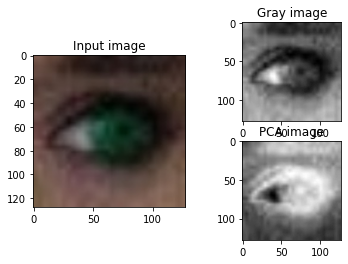

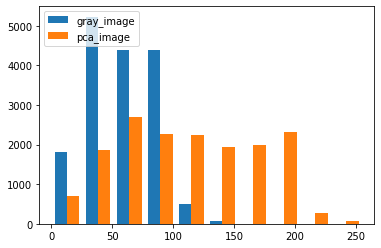

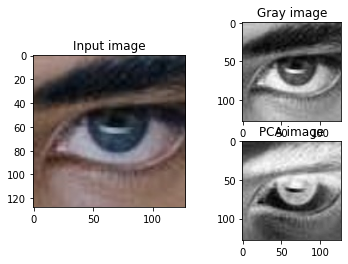

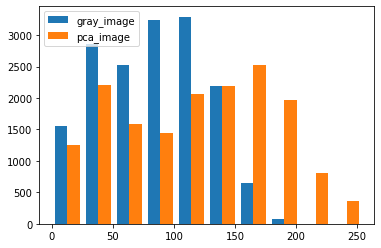

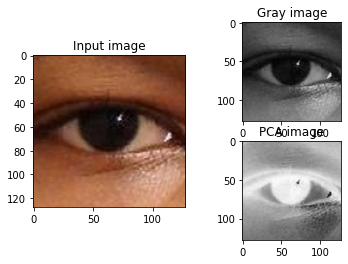

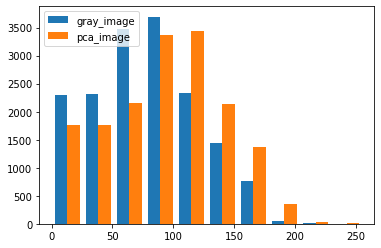

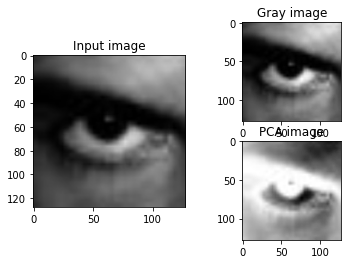

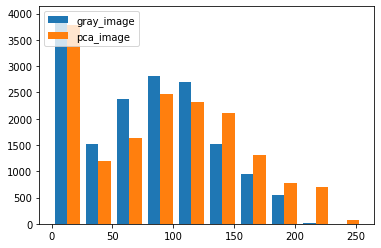

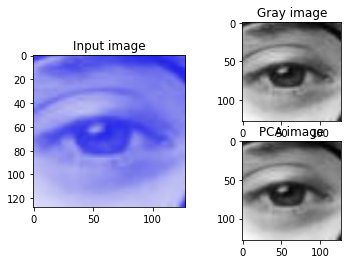

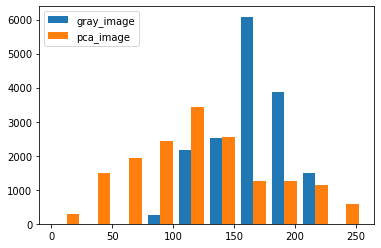

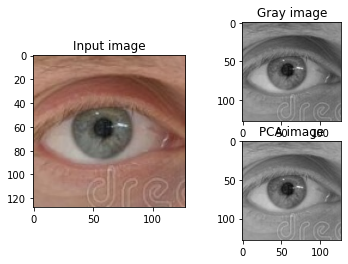

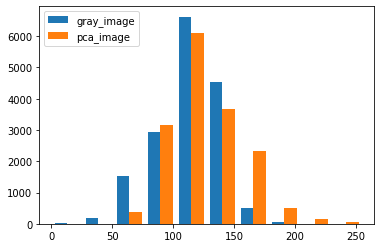

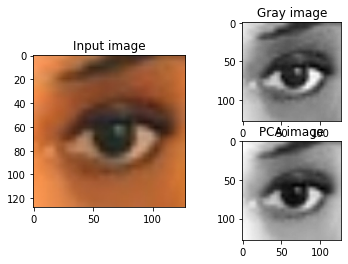

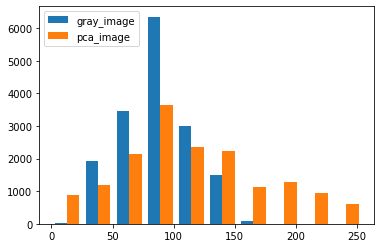

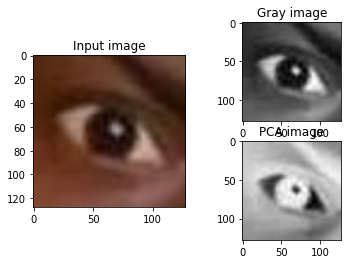

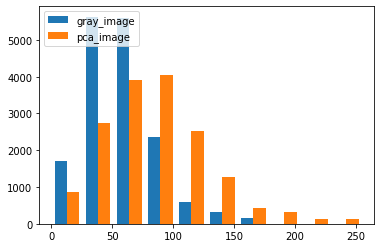

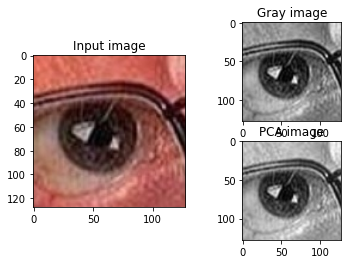

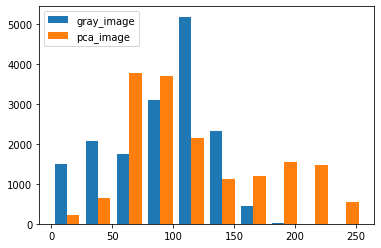

In [ ]:
if __name__ == '__main__':
  
  folder = "/content/drive/MyDrive/ProgettoCV&DL/MRL/MRL_opened_eye"   #percorso della cartella opened_eye
  index = 0
  for file_name in os.listdir(folder):
      if index == 9 : 
        break 
      input_image =cv2.imread(folder + "/" + file_name)
      input_image =cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB) 
      gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)  # conversione in scala di grigi
      pca_image = PCAImage(input_image, n_components=1)
 
      
      #Print grafico dell'immagine originale
      plt.figure()
      plt.subplot(1,2,1)
      plt.title('Input image')
      plt.imshow(input_image)
      #cv2_imshow(input_image)    #non funziona mette l'immagine fuori dalla griglia
      
      #Print grafico in GreySCALE
      plt.subplot(2,2,2)
      plt.title('Gray image')
      plt.imshow(gray_image, cmap='gray')
     
      #Print grafico in PCA
      plt.subplot(2,2,4)
      plt.title('PCA image')
      plt.imshow((255-pca_image), cmap='gray')
      plt.show()

      #Print istogramma
      plt.hist([ImgToPixels(gray_image), ImgToPixels(pca_image)], label=['gray_image', 'pca_image'])
      plt.legend(loc='upper left')
      plt.show()
      
      index += 1